 # **DỰ ĐOÁN BỆNH TIỂU ĐƯỜNG**

**Tên các thành viên trong nhóm:
Ngô Tuấn Anh_2100008199,
Đỗ Thành Danh_2100010143,
Phạm Trọng Đăng_2100010206,
Trần Văn Cảm_2100010210**

#Mô tả các biến

**Number of times pregnant:** Số lần mang thai.

**Plasma glucose concentration a 2 hours in an oral glucose tolerance test:** Nồng độ glucose trong huyết thanh sau 2 giờ trong cuộc thử nghiệm dung nạp glucose qua đường uống.

**Diastolic blood pressure (mm Hg):** Huyết áp tâm thu (mm Hg).


**Triceps skin fold thickness (mm):** Độ dày nếp da cơ thể (mm).

**2-Hour serum insulin (mu U/ml):** Insulin huyết thanh sau 2 giờ (mu U/ml).

**Body mass index (weight in kg/(height in m)^2):** Chỉ số khối cơ thể (cân nặng trong kg/(chiều cao trong m)^2).

**Diabetes pedigree function:** Chức năng di truyền tiểu đường.

**Age:** Tuổi

**Outcome:** Biến mục tiêu

1: là người đó bị tiểu đường

0: là người đó không bị tiểu đường

(Nếu giá trị là 1, đó có thể biểu thị rằng người đó bị tiểu đường (class 1), và nếu giá trị là 0, đó có thể biểu thị rằng người đó không bị tiểu đường (class 0).)

In [1]:
#khai báo các thư viện
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Đọc file csv tieu_duong
df = pd.read_csv('/content/tieu_duong.csv')
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Iastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Viewing data

In [3]:
missing_values = df.isnull().sum()
print("Kiểm tra các giá trị thiếu trong dữ liệu:")
print(missing_values)

Kiểm tra các giá trị thiếu trong dữ liệu:
Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Iastolic blood pressure                                                     0
Triceps skin fold thickness                                                 0
2-Hour serum insulin                                                        0
Body mass index                                                             0
Diabetes pedigree function                                                  0
Age                                                                         0
Outcome                                                                     0
dtype: int64


In [4]:
df.shape

(768, 9)

In [5]:
# kiểu dữ liệu của các cột
df.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Iastolic blood pressure                                                       int64
Triceps skin fold thickness                                                   int64
2-Hour serum insulin                                                          int64
Body mass index                                                             float64
Diabetes pedigree function                                                  float64
Age                                                                           int64
Outcome                                                                       int64
dtype: object

# Modeling

In [6]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Iastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3 Mô Hình: DecisionTree, RandomForest, K-Nearest Neighbors(knn)

In [7]:
tree = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier()

In [8]:
## Chia thành đặc trưng (X) và biến mục tiêu (y)
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, shuffle=True, random_state = 42)

### Mô Hình DecisionTreeClassifier

In [10]:
# Huấn luyện mô hình trên tập huấn luyện
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
accuracy = cross_val_score(tree, X_train, y_train, cv = 5, scoring = 'accuracy')
print(accuracy)
print('\nmean accuracy = ',accuracy.mean(),'\nstd accuracy = ', accuracy.std())
# Trung bình độ chính xác (mean accuracy) và Độ lệch chuẩn độ chính xác (std accuracy)

[0.73381295 0.78985507 0.7173913  0.76086957 0.73913043]

mean accuracy =  0.7482118652903763 
std accuracy =  0.02503630244228415


In [12]:
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác: ")
accuracy

Độ chính xác: 


0.7922077922077922

### Mô Hình RandomForestClassifier

In [13]:
## Huấn luyện mô hình trên tập huấn luyện
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
accuracy = cross_val_score(rfc, X_train, y_train, cv = 5, scoring = 'accuracy')
print(accuracy)
print('\nmean accuracy = ',accuracy.mean(),'\nstd accuracy = ', accuracy.std())
# Trung bình độ chính xác (mean accuracy) và Độ lệch chuẩn độ chính xác (std accuracy)

[0.76258993 0.78985507 0.75362319 0.77536232 0.7826087 ]

mean accuracy =  0.7728078406839745 
std accuracy =  0.013157863425267776


In [16]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác: ")
accuracy

Độ chính xác: 


0.6883116883116883

### Mô Hình KNN

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
accuracy = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
print(accuracy)
print('\nmean accuracy = ',accuracy.mean(),'\nstd accuracy = ', accuracy.std())
# Trung bình độ chính xác (mean accuracy) và Độ lệch chuẩn độ chính xác (std accuracy)

[0.68345324 0.73188406 0.66666667 0.74637681 0.74637681]

mean accuracy =  0.7149515170472318 
std accuracy =  0.033422679764607874


In [19]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác: ")
accuracy

Độ chính xác: 


0.6493506493506493

Trên đây tất cả đều không có chuẩn hóa và bất kỳ thao tác nào với dữ liệu, đồng thời không điều chỉnh mô hình (là không chọn siêu tham số), và ta chỉ việc sử dụng các mô hình, qua đó đã thu được các kết quả sau:

*   Mô hình Decision tree - có độ chính xác = 0,792
*   Mô hình Random forest - có độ chính xác = 0,688
*   Mô hình KNN - có độ chính xác = 0,649

Vậy, hiện tại có thể kết luận như sau rằng mô hình **Decision tree** là mô hình hoạt động tốt nhất, nhưng chúng ta nên tùy chỉnh từng mô hình để đạt được sự cải thiện chất lượng cho từng mô hình.

# Mô Hình DecisionTreeClassifier (Hyper tuning of the model)

Một số siêu tham số trong cây quyết định có thể được cấu hình để tối ưu hóa mô hình.

**max_depth:** Độ sâu tối đa của cây. Tham số này xác định cây sẽ được chia thành các mức (phân chia) bao nhiêu lần. Độ sâu lớn có thể dẫn đến việc huấn luyện quá mức, còn độ sâu nhỏ có thể dẫn đến thiếu hụt.

**min_samples_leaf:** Số lượng mẫu tối thiểu trong nút lá (sau khi phân tách). Nếu sau khi số lượng mẫu trong một trong các nhánh mới nhỏ hơn giá trị này, việc phân tách sẽ không được thực hiện.

**splitter:** Một chiến lược để chọn một thuộc tính để phân tách. Nó có thể là "best" (thuộc tính tốt nhất) hoặc "random" (thuộc tính ngẫu nhiên).

Hãy xem xét từng siêu tham số riêng biệt và sau đó kết hợp các giá trị tốt nhất để tìm ra sự kết hợp tốt nhất với độ chính xác cao nhất.

### max_depth

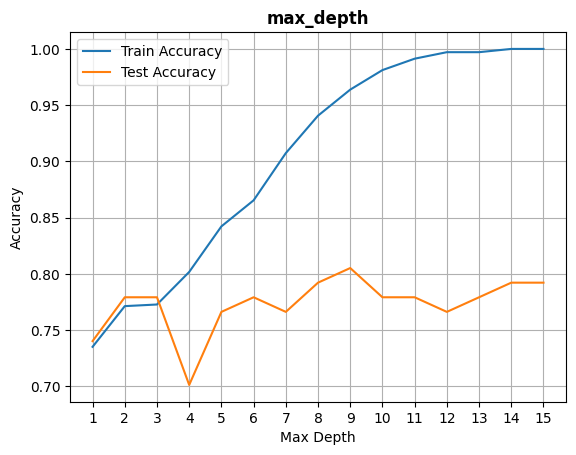

In [20]:
max_depth_values = range(1,16)

train_accuracy = []
test_accuracy = []

for depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state = 42)

    tree.fit(X_train,y_train)
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test,test_pred))


plt.plot(max_depth_values, train_accuracy, label='Train Accuracy')
plt.plot(max_depth_values, test_accuracy, label='Test Accuracy')

plt.title('max_depth', fontweight = 'bold')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(range(1,16,1))

plt.show()

Biểu đồ của bạn mô tả mối quan hệ giữa độ sâu tối đa và độ chính xác cho cả tập dữ liệu huấn luyện và kiểm tra. Cụ thể:

Trục y biểu diễn độ chính xác, thay đổi từ 0.70 đến 1.00.
Trục x biểu diễn độ sâu tối đa, thay đổi từ 0 đến 15.
Đường “Train Accuracy” màu xanh dương, bắt đầu với độ chính xác khoảng 0.75 ở độ sâu tối đa là 1, tăng dần cho đến khi đạt gần như độ chính xác tuyệt đối ở độ sâu tối đa là 15.
Đường “Test Accuracy” màu cam, cũng bắt đầu với độ chính xác khoảng 0.75 nhưng biến đổi giữa khoảng 0.75 và 0.85 khi độ sâu tối đa tăng.
Nhìn chung, độ chính xác huấn luyện tăng đều với sự tăng của độ sâu tối đa, trong khi độ chính xác kiểm tra biến đổi nhưng nói chung luôn thấp hơn độ chính xác huấn luyện.
     

### min_samples_leaf

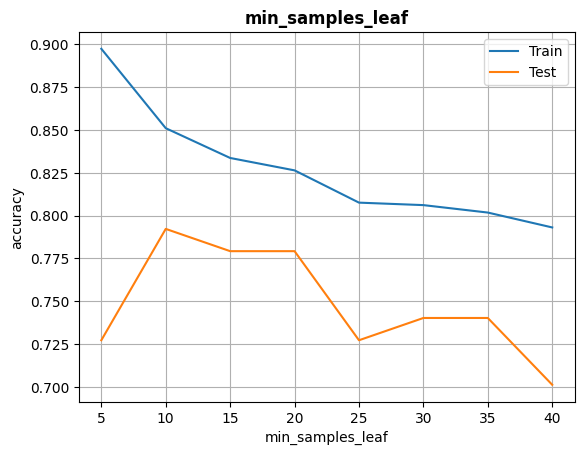

In [21]:
min_samples_leaf = range(5,41,5)

train_accuracy = []
test_accuracy = []

for leaf in min_samples_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=leaf,random_state = 42)
    tree.fit(X_train,y_train)

    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test,test_pred))

plt.plot(min_samples_leaf,train_accuracy, label = 'Train')
plt.plot(min_samples_leaf, test_accuracy, label = 'Test')

plt.title('min_samples_leaf', fontweight = 'bold')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')

plt.grid(True)
plt.legend()
plt.xticks(range(5,41,5))
plt.show()

Ta có thể nhận xét với biểu đồ thì min_samples_leaf trong trại thái test có độ chính xác cao nhất là 10, nhưng chạy mô hình kết quả tốt nhất nằm ở 11.

In [24]:
tree = DecisionTreeClassifier(min_samples_leaf= 11,random_state = 42)

In [25]:
tree.fit(X_train,y_train)

accuracy = cross_val_score(tree,X_train,y_train,cv = 5, scoring = 'accuracy')

print(accuracy)
print('\nmean accuracy = ',accuracy.mean(),'\nstd accuracy = ', accuracy.std())

[0.73381295 0.78985507 0.72463768 0.78985507 0.80434783]

mean accuracy =  0.7685017203628401 
std accuracy =  0.032632006793814866


In [26]:
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác: ")
accuracy

Độ chính xác: 


0.8181818181818182

Khi ta xây dựng classification_report và nhận được các ước tính bổ sung về độ chính xác của mô hình trong đó:

Precision: Độ chính xác. Tỷ lệ của các dự đoán đúng (True Positives) trên tổng số dự đoán dương (True Positives + False Positives).

Recall (Sensitivity hoặc True Positive Rate): Tỷ lệ của các dự đoán đúng trên tổng số thực sự là positive (True Positives + False Negatives).

F1-score: Trung bình điều hòa giữa precision và recall. Nó là một chỉ số tổ hợp giữa hai giá trị trên và được sử dụng khi bạn muốn cân nhắc cả precision và recall.

Support: Số lượng mẫu thực sự của từng lớp trong tập kiểm thử.

Accuracy: Tỉ lệ các dự đoán đúng trên tổng số dự đoán. Đây là giá trị đã tính trước đó bằng accuracy_score.

Macro avg: Trung bình cộng của các giá trị precision, recall và f1-score cho từng lớp. Đối với precision, recall và f1-score, macro avg trung bình các giá trị không quan trọng số theo kích thước của từng lớp.

Weighted avg: Trung bình có trọng số của precision, recall và f1-score, với trọng số là số lượng mẫu thực sự của từng lớp. Điều này giúp đánh giá hiệu suất của mô hình trên toàn bộ tập dữ liệu.

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        50
           1       0.74      0.74      0.74        27

    accuracy                           0.82        77
   macro avg       0.80      0.80      0.80        77
weighted avg       0.82      0.82      0.82        77



Sau khi tinh chỉnh các mô hình, chúng ta đã thấy được độ chính xác riêng biệt đã 79,2% lên 81,8%.



Vẽ biểu đồ heatmap của ma trận nhầm lẫn (confusion matrix) giữa dự đoán và thực tế của mô hình

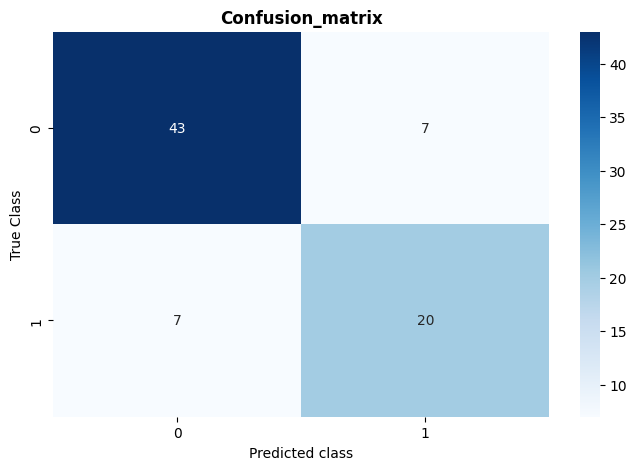

In [28]:
fig = plt.subplots(figsize = (8,5))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')

plt.title('Confusion_matrix', fontweight = 'bold')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

Vẽ biểu đồ cột ngang (horizontal bar chart) để hiển thị mức độ quan trọng của các biến (features) trong mô hình Decision Tree.

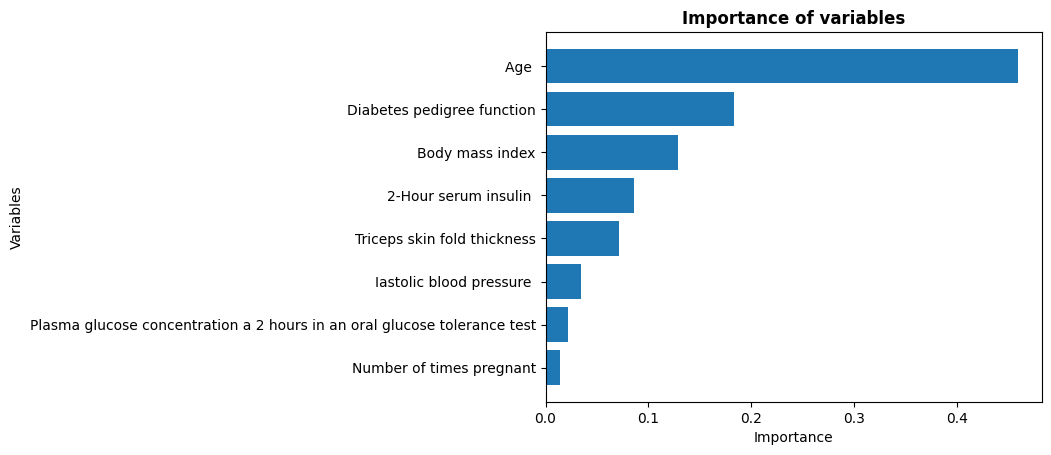

In [29]:
importance = tree.feature_importances_
feature_names = X.columns


plt.barh(feature_names, sorted(importance))
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('Importance of variables', fontweight = 'bold')


plt.show()

Cuối cùng, để xem xét biến nào đóng vai trò quan trọng trong việc đào tạo mô hình
Trong trường hợp trên, biến Age là độ tuổi (là biến này đóng góp lớn nhất) dẫn đến kết quả của bệnh tiểu đường,
    
Number of times pregnant: Số lần mang thai.Plasma glucose concentration a 2 hours in an oral glucose tolerance test: Nồng độ glucose trong huyết thanh sau 2 giờ trong cuộc thử nghiệm dung nạp glucose qua đường uống. là 2 biến tác động ít nhât

   Nhóm em đã
sử dụng feature_importances_ là một cách để đánh giá tầm quan trọng của các biến (features) trong mô hình Decision Tree. Khi cây quyết định được huấn luyện, nó tự động gán một giá trị quan trọng cho mỗi biến, cho biết mức độ mà biến đó đóng góp vào quá trình đưa ra quyết định của mô hình

## Kết luận DecisionTreeClassifier

Trong DecisionTree, chúng ta đã đạt có được kết quả không thay đổi
     , nhưng qua đó ta cũng xem xét tầm quan trọng của các biến và nói chung những biến nào được sử dụng cho mô hình DecisionTree này
     (vì thậm chí một số biến đơn giản là không quan trọng theo bất kỳ cách nào và không được sử dụng theo bất kỳ cách nào trong mô hình này, điều này có thể được nhận thấy
     trong sơ đồ trên)

  Vì vậy, kết quả của mô hình này là khả năng dự đoán bệnh tiểu đường với độ chính xác lên tới 79,2%.

# RandomForestClassifier (Hyper tuning of the model)

Một số siêu tham số có thể được tùy chỉnh để đạt được hiệu suất mô hình tốt hơn:

  **n_estimators:** Số lượng cây trong một khu rừng ngẫu nhiên. Tham số này chỉ định số lượng cây sẽ được tạo trong quần thể. Nhiều cây hơn có thể cải thiện hiệu suất của mô hình nhưng cũng có thể dẫn đến tăng thời gian đào tạo. Giá trị mặc định là 100.

  **max_deep:** Độ sâu tối đa của mỗi cây. Hạn chế độ sâu của cây có thể giúp ích trong cuộc chiến chống đào tạo lại. Nếu giá trị là Không thì cây sẽ phát triển cho đến khi tất cả các lá đều sạch hoặc cho đến khi đạt được số lượng mẫu tối thiểu để phân tách.

  **min_samples_leaf:** Số lượng mẫu tối thiểu cần thiết để tạo thành một lá cây. Nếu còn lại ít mẫu trong nút hơn giá trị đã chỉ định thì quá trình tạo trang tính sẽ dừng lại. Việc tăng giá trị này có thể giúp loại bỏ nhiễu và tăng khả năng khái quát hóa của mô hình. Giá trị mặc định là 1.

  **max_features:** Số lượng đối tượng được xem xét ở mỗi phần của cây. Việc chỉ định một giá trị cụ thể có thể giới hạn số lượng tính năng có thể được sử dụng riêng biệt và có thể giúp chống lại việc trang bị quá mức. Theo mặc định, giá trị là "auto", có nghĩa là sqrt(n_features), trong đó n_features là số lượng tính năng.

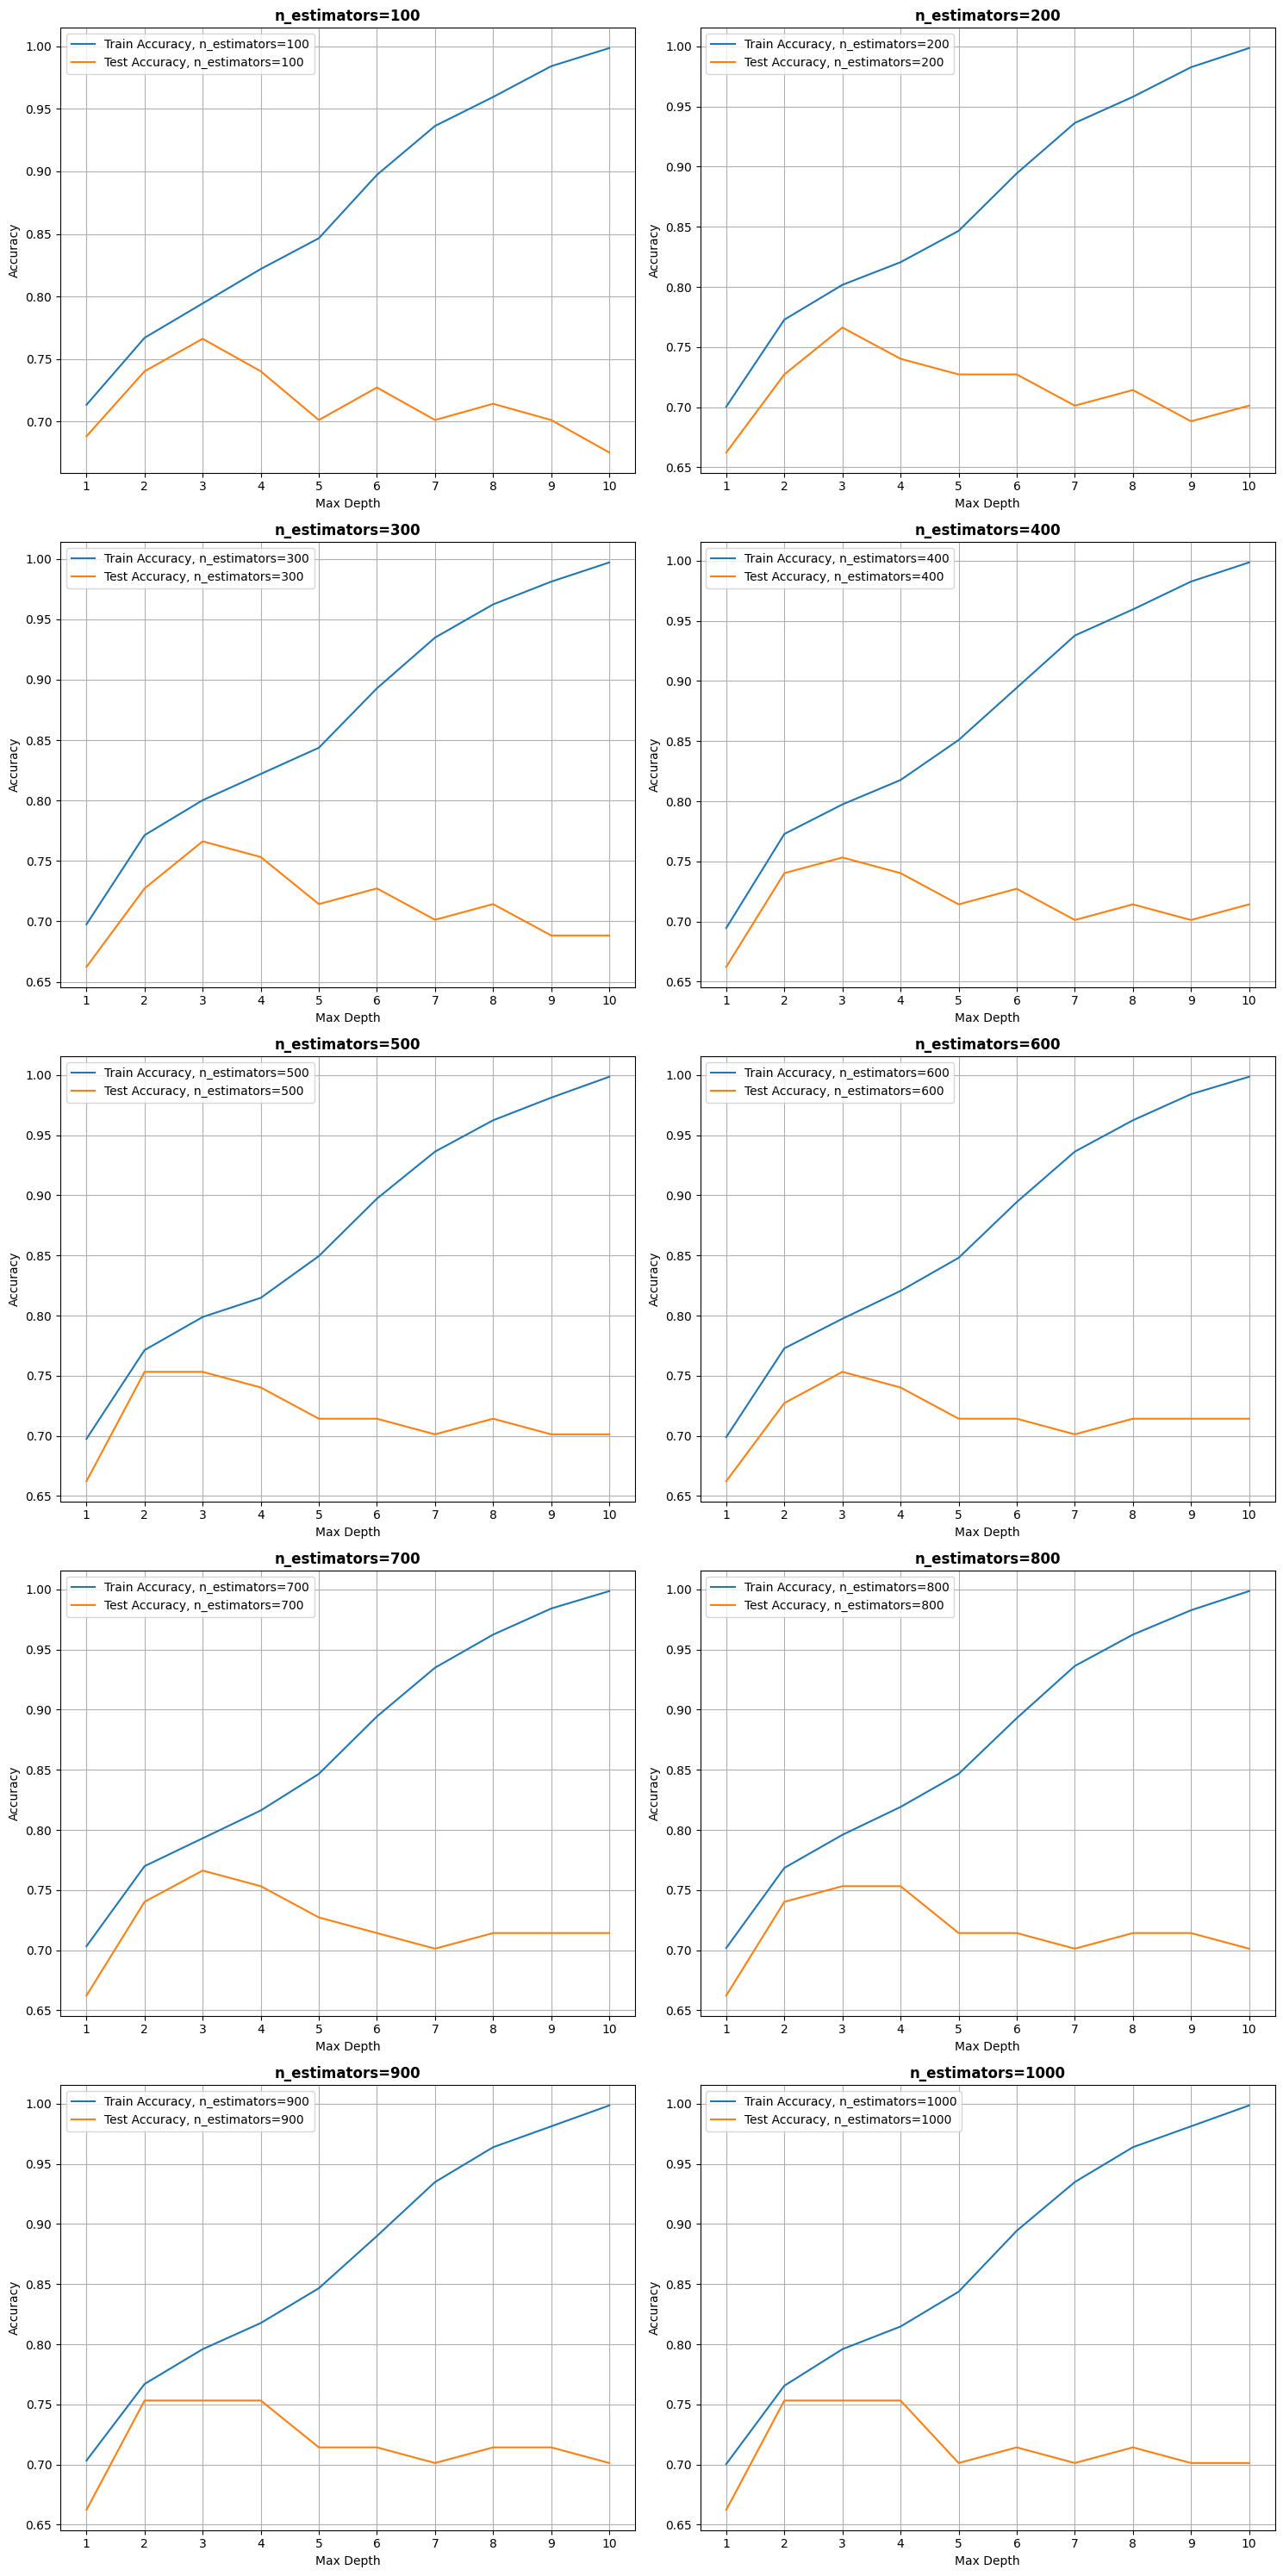

In [30]:
n_estimators_values = range(100, 1001, 100)


max_depth_values = range(1, 11)


fig, axes = plt.subplots(5,2, figsize=(15, 30))

for i, n_estimators in enumerate(n_estimators_values):
    train_accuracy = []
    test_accuracy = []

    for max_depth in max_depth_values:
        rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

        rfc.fit(X_train, y_train)
        train_pred = rfc.predict(X_train)
        test_pred = rfc.predict(X_test)

        train_accuracy.append(accuracy_score(y_train, train_pred))
        test_accuracy.append(accuracy_score(y_test, test_pred))

    ax = axes[i//2, i%2]

    ax.plot(max_depth_values, train_accuracy, label=f'Train Accuracy, n_estimators={n_estimators}')
    ax.plot(max_depth_values, test_accuracy, label=f'Test Accuracy, n_estimators={n_estimators}')

    ax.set_title(f'n_estimators={n_estimators}', fontweight='bold')
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)
    ax.set_xticks(range(1, 11, 1))

plt.tight_layout()
plt.show()

Trong các n_estimators trên ta thấy được mẫu n_estimators = 300 có max_depth = 3 có chỉ số cao nhất

Huấn luyện mô hình và kiểm tra nó trên mẫu thử nghiệm với các tham số này

In [31]:
rfc = RandomForestClassifier(max_depth = 3,
                             n_estimators = 300,
                             random_state = 42)

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=42)

In [32]:
accuracy = cross_val_score(rfc, X_train, y_train, cv = 5, scoring = 'accuracy')

print(accuracy)
print('\nmean accuracy', accuracy.mean(),'\nstd accuracy', accuracy.std())

[0.77697842 0.7826087  0.7173913  0.76086957 0.76811594]

mean accuracy 0.7611927849025127 
std accuracy 0.023127609892523757


In [33]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác: ")
print(accuracy)

Độ chính xác: 
0.7662337662337663


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        50
           1       0.70      0.59      0.64        27

    accuracy                           0.77        77
   macro avg       0.75      0.73      0.73        77
weighted avg       0.76      0.77      0.76        77



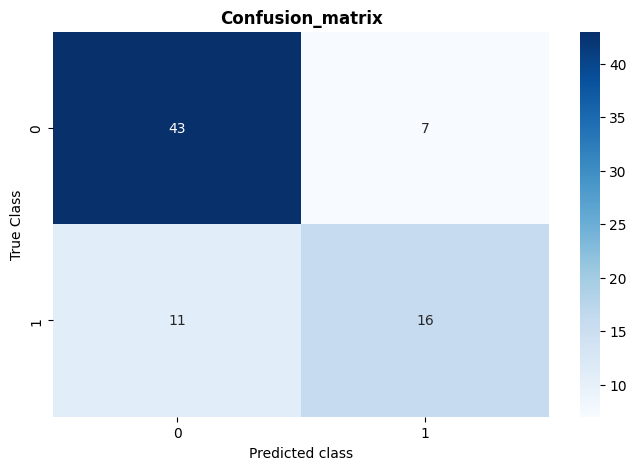

In [35]:
fig = plt.subplots(figsize = (8,5))

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')

plt.title('Confusion_matrix', fontweight = 'bold')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

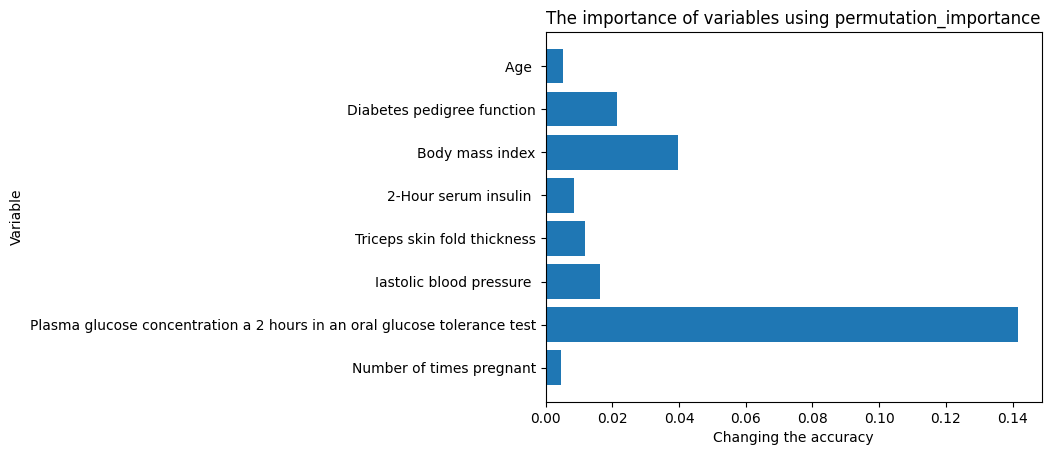

In [36]:
result = permutation_importance(rfc, X_test, y_test, n_repeats= 20, random_state=42)

importances = result.importances_mean
feature_names = X_test.columns

plt.barh(feature_names, importances)
plt.xlabel('Changing the accuracy')
plt.ylabel('Variable')
plt.title('The importance of variables using permutation_importance')
plt.show()

Biến quan trọng nhất ảnh hưởng đến mô hình là Plasma glucose concentration a 2 hours in an oral glucose tolerance test hay còn gọi là Nồng độ glucose trong huyết thanh sau 2 giờ trong cuộc thử nghiệm dung nạp glucose qua đường uống.
Trong khi đó Age lại có vẻ giảm và sức ảnh hưởng thấp lại đối voiwsw mô hình này.

## Kết luận RandomForestClassifier

Kết luận có thể rút ra từ phân tích mô hình này là độ chính xác của dự đoán đã tăng 7.8%, điều này là khá tốt.

kết quả
     chúng ta có thể xác định các biến thay đổi không có ý nghĩa trong việc phân loại giá trị, đồng thời điều chỉnh các tham số của mô hình và
     ở giai đoạn này là không quan trọng mà qua đó còn thể hiện sự thay đổi khác nhau giữa các biến môn hình.

# KNN (hyper tuning of the model)

Phương pháp hàng xóm gần nhất đo khoảng cách đến hàng xóm gần nhất và so sánh lớp của những hàng xóm này, sau đó
     định nghĩa lớp, do đó đối với mô hình này cần đảm bảo rằng tất cả các biến có cùng trọng số,
     Để mô hình hoạt động tốt hơn cần phải chuẩn hóa dữ liệu

In [37]:
scaler = StandardScaler()

In [38]:
df_scaler = df.copy()

In [39]:
df_scaler.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Iastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Kiểm tra xem các tên cột biến số học

In [40]:
print(df_scaler.columns)


Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Iastolic blood pressure ', 'Triceps skin fold thickness',
       '2-Hour serum insulin ', 'Body mass index',
       'Diabetes pedigree function', 'Age ', 'Outcome'],
      dtype='object')


In [41]:
# Định nghĩa biến num như một danh sách các tên cột của biến số số học
num = ['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Iastolic blood pressure ', 'Triceps skin fold thickness',
       '2-Hour serum insulin ', 'Body mass index',
       'Diabetes pedigree function', 'Age ']

# Sử dụng biến num để chuẩn hóa các biến số số học trong DataFrame
df_scaler[num] = scaler.fit_transform(df_scaler[num])


# Hiển thị 5 hàng đầu tiên của DataFrame sau khi chuẩn hóa
df_scaler.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Iastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [42]:
X = df_scaler.drop('Outcome', axis = 1)
y = df_scaler['Outcome']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, shuffle=True, random_state = 42)


In [44]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

accuracy = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')

print(accuracy)
print('\nmean =', accuracy.mean(),'\nstd =', accuracy.std())

[0.72661871 0.76811594 0.6884058  0.72463768 0.76811594]

mean = 0.7351788134709623 
std = 0.030139060577352012


In [45]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác: ")
accuracy

Độ chính xác: 


0.6363636363636364


 Đối với thuật toán k-Nearest Neighbors (kNN), có các siêu tham số sau có thể được định cấu hình:

  **n_neighbors:** Số lượng hàng xóm gần nhất sẽ được tính đến trong quá trình phân loại hoặc hồi quy. Đây là một trong những siêu tham số quan trọng nhất của kNN.

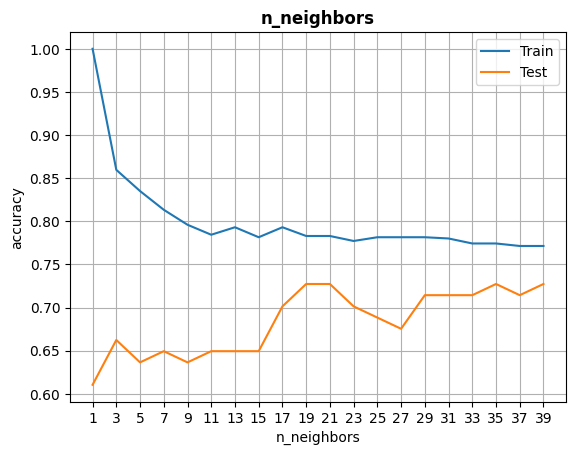

In [46]:
n_neighbors = range(1,40,2)

train_accuracy = []
test_accuracy = []

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)

    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test,test_pred))

plt.plot(n_neighbors, train_accuracy, label = 'Train')
plt.plot(n_neighbors, test_accuracy, label = 'Test')

plt.title('n_neighbors', fontweight = 'bold')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.grid(True)
plt.legend()
plt.xticks(range(1,40,2))
plt.show()

Như bạn có thể thấy trên biểu đồ, với số lượng hàng xóm tăng lên, độ chính xác của mô hình sẽ tăng lên và độ chính xác đạt tới
     tối đa nếu giá trị của hàng xóm là 21

 và 21 có ý nghĩa gì khi mô hình có khả năng khái quát hóa tốt (ví dụ với giá trị 1, mô hình sẽ chỉ lấy hàng xóm đầu tiên và phân loại giống với nó) và với giá trị hàng xóm lớn thì kết quả là được so sánh và giá trị phổ biến nhất trong số các hàng xóm được chọn, vì vậy chúng ta huấn luyện mô hình với giá trị hàng xóm 21

In [47]:
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [48]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác: ")
accuracy

Độ chính xác: 


0.7272727272727273

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80        50
           1       0.62      0.56      0.59        27

    accuracy                           0.73        77
   macro avg       0.70      0.69      0.69        77
weighted avg       0.72      0.73      0.72        77



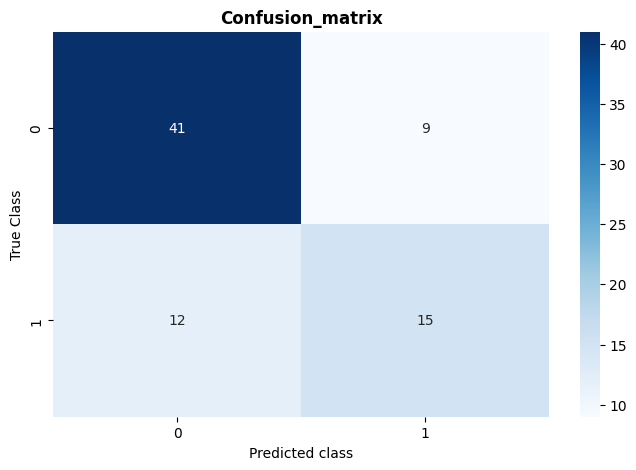

In [50]:
fig = plt.subplots(figsize = (8,5))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')

plt.title('Confusion_matrix', fontweight = 'bold')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

Kết quả là mô hình knn có độ chính xác của nó đạt 722%, các số liệu như độ chính xác và thu hồi cũng được cải thiện.
     

  Đây là những chỉ số quan trọng trong bộ dữ liệu y tế, chúng ta cũng có thể nói rằng độ chính xác đạt được 72.2 là một chỉ báo khá là tốt.

# Kết quả so sánh giữa các mô hình

                       Mô hình cơ bản                 Hyper tuning of the model               % độ chính xác đã tăng lên bao nhiêu    
    
    DesicionTree           79,2%                              81,8%                                    2,6%
    
    RandomForest           68,8%                              76,6%                                    7,8%
    
    KNN                    64,9%                              72,2%                                    7,3%


Và có thể nói trong tập dữ liệu tieu_duong.csv thì độ chính xác của mô hình DesicionTree(cây quyết định) có độ chính xác cao nhất là 81,8% là một chỉ số khá là tốt so với hai mô hình còn lại là RandomForewst là 76,6% (sau điều chỉnh) và KNN là 72,2% (sau điều chỉnh).

Vì vậy có thể nói trong tập dữ liệu trên thì mô hình DesicionTree là mô hình tốt hơn hai mô hình kia.


**Và trên đây là tiểu luận của bọn em là DỰ ĐOÁN BỆNH TIỂU ĐƯỜNG và so sánh độ chính xác giữa 3 mô hình DecisionTree, RandomForest, K-Nearest Neighbors(knn)**

**Có thể còn có nhiều sai sót mong cô chân thành góp ý để bọn em cải thiện.**

**Em xin chân thành cảm ơn cô.**